# Major Project
## Team members: 
* 1 Yash Tambat
* 2 Harshana Sundaram
* 3 Dhanush adhitya Subramanian
* 4 Vishali Sudhakar
* 5 Maithre Sunitha
* 6 Arya SS

# Heart Disease Prediction Using Machine Learning (With GUI)

### 1 Importing the Libraries

In [1]:
import pandas as pd

### 2 importing the Datasets

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


### 3 Taking Care of Missing Values

In [4]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### Looking at the output, we can see that we are fortunate this time. There is no missing value in our dataset.  

### 4 Taking care of Duplicate Values

#### Let’s first check whether our dataset contains some duplicated values. We are interested in the boolean answer yes or no (Means True or False).



In [5]:
data_dup = data.duplicated().any()

In [6]:
data_dup

True

#### As you can see here, the output is True, which means our dataset has some duplicate values. So let’s drop them.

In [7]:
data = data.drop_duplicates()

#### Now let’s check for the duplicated values once again.

In [8]:
data_dup = data.duplicated().any()
data_dup

False

#### As you can see here, the output is False, which means our dataset becomes free from duplicated values.

### 5. Data Processing

#### In this question, we have to perform preprocessing. Before that, let’s separate categorical columns and numerical columns (Means columns with categorical values and columns with numerical values). because we have to handle them separately.

In [9]:
cate_val = []
cont_val = []
for column in data.columns:
    if data[column].nunique()<=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [10]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [11]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

### 6. Encoding Categorical Data

#### To explain the concept of encoding, let me take one column from the list of categorical columns CP (Chest Pain Type) Having four values 0,1,2 and 3. Because of these values in the CP column, some of the machine learning models can understand there are numerical orders between these values. So these models can understand order does matter. But this is not the case. There is no order here. It is just a chest pain type.

In [12]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [13]:
data["cp"].unique()

array([0, 1, 2, 3], dtype=int64)

#### So we will convert these CP column values into binary vectors, which means the CP column will be converted into four columns (Also other categorical columns). Why four? Because it has four unique values, if five unique values the five likewise.

In [14]:
cate_val.remove('sex')
cate_val.remove('target')
data = pd.get_dummies(data , columns= cate_val , drop_first =True)

In [15]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


#### From the above output, we can see the binary vectors. These variables are called dummy variables. To create these dummy variables, I have used the get_dummies method of Pandas. I have removed sex and target columns from the list because they are already in the proper format.

#### From the above output, we can see the binary vectors. These variables are called dummy variables. To create these dummy variables, I have used the get_dummies method of Pandas.

#### I have removed sex and target columns from the list because they are already in the proper format. These dummy variables can create one problem called a dummy variable trap. What is a dummy variable trap? The dummy variable is a scenario in which the independent variables are highly correlated. In simple terms, one variable can be predicted from others. To remove this problem of dummy variable trap, we have used drop_first = True.


### 7 . Feature Scaling

#### Feature scaling allows us to put our features into the same scale. Why do you need to do this?

#### Please remember, feature scaling is essential for machine learning algorithms that calculate distances between data. If not scale, the features with a higher value range start dominating when calculating distances.The machine learning algorithms requiring feature scaling are mostly KNN, Neural Networks, SVM, Linear Regression, and Logistic Regression. The machine learning algorithms that do not require feature scaling are mostly non-linear machine learning algorithms like Decision Tree, Random Forest, Adaboost, Naive Bayes, etc. Please remember, any non-distance-based algorithm is not affected by feature scaling.



In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
st = StandardScaler()

In [18]:
data[cont_val] = st.fit_transform(data[cont_val])

In [19]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


### 8.  Splitting The Dataset Into The Training Set And Test Set

#### We will split our dataset into two sets: one set for training and one for testing. I split the dataset into 80% training data and 20% testing data.

Train the model on the training set.
Test the model on the testing set, and evaluate how well we did.

In [20]:
X = data.drop("target" ,axis =1)

In [21]:
y = data["target"]

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y ,test_size=0.2 , random_state=42)

### 9 . Logistics Regression

#### Logistic regression is one of the most popular Machine Learning algorithms under the Supervised Learning technique. It is used for predicting the categorical dependent variable using a given set of independent variables.

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
log = LogisticRegression()
log.fit(X_train ,y_train)

LogisticRegression()

In [26]:
y_pred1 = log.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy_score(y_test , y_pred1)

0.7868852459016393

#### From the above score, we can see that Logistics Regression is 79% accurate on this dataset.

### 10. SVC (Support Vector Classifier)

#### Support vector machines (SVMs) are powerful yet flexible supervised machine learning methods used for classification, regression, and detection of outliers. We are going to use it for the classification program.

In [29]:
from sklearn import svm

In [30]:
svm = svm.SVC()


In [31]:
svm.fit(X_train ,y_train)

SVC()

In [32]:
y_pred2 = svm.predict(X_test)

In [33]:
accuracy_score(y_test ,y_pred2)

0.8032786885245902

#### From the above score, we can see that SVC is 80% accurate on this dataset.

### 11. K Neighbors Classifier

#### The K Nearest Neighbor algorithm falls under the Supervised Learning category and can be used for classification and regression. It is also a versatile algorithm for imputing missing values and resampling datasets.



In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
knn = KNeighborsClassifier()

In [36]:
knn.fit(X_train ,y_train)

KNeighborsClassifier()

In [37]:
y_pred3 = knn.predict(X_test)

In [38]:
accuracy_score(y_test , y_pred3)

0.7377049180327869

#### From the above score, we can see that K Neighbours Classifier is 74% Accurate on this dataset.

#### By default, this K Nearest Neighbor algorithm uses five neighbors. So we will find the best value for the number of neighbors.

In [39]:
score = []
for k in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train , y_train)
    y_pred = knn.predict(X_test)
    score.append(accuracy_score(y_test , y_pred))

In [40]:
score

[0.7213114754098361,
 0.8032786885245902,
 0.7049180327868853,
 0.7049180327868853,
 0.7377049180327869,
 0.8032786885245902,
 0.7868852459016393,
 0.8032786885245902,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7377049180327869,
 0.7540983606557377,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869]

In [41]:
import matplotlib.pyplot as plt

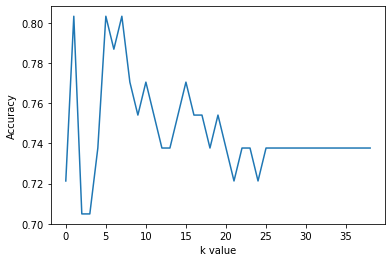

In [42]:
plt.plot(score)
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.show()

### As we can see from the above plot, the best value for the n_neighbors parameter is 2. So let’s use this value.

In [43]:
knn = KNeighborsClassifier(n_neighbors =2)
knn.fit(X_train ,y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test , y_pred)

0.8032786885245902

#### As you can see, the accuracy has increased to 81%. Previously it was 74%.



### Non-Linear ML Algorithms
#### As discussed, encoding and feature scaling are not required for non-linear ML Algorithms.So let’s load our dataset once again, and also, we are going to remove duplicate values.

In [44]:
data  = pd.read_csv("heart.csv")

In [45]:
data = data.drop_duplicates()

In [46]:
X = data.drop("target" ,axis =1)
y= data["target"]

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X, y ,test_size=0.2 ,random_state=42)

### 12. Decision Tree Classifier

#### A Decision Tree is a supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems.

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
dt = DecisionTreeClassifier()

In [50]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [51]:
y_pred4 = dt.predict(X_test)

In [52]:
accuracy_score(y_test , y_pred4)

0.7377049180327869

### 13. Random Forest Classifier

#### A random forest is a meta estimator that fits several decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the accuracy and control over-fitting. So let’s use a random forest classifier for our dataset.

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
rf =RandomForestClassifier()

In [55]:
rf.fit(X_train ,y_train)

RandomForestClassifier()

In [56]:
y_pred5 = rf.predict(X_test)

In [57]:
accuracy_score(y_test , y_pred5)

0.8524590163934426

#### From the above score, we can see that Random Forest Classifier is 85% Accurate on this dataset.



### 14. Gradient Boosting Classifier

#### Gradient boosting is a method standing out for its prediction speed and accuracy, particularly with large and complex datasets. From Kaggle competitions to machine learning solutions for business, this algorithm has produced the best results. We already know that errors play a major role in any machine learning algorithm. There are mainly two types of error, bias error and variance error. Gradient boost algorithm helps us minimize bias error of the model

####  A gradient boosting classifier is used when the target column is binary.

In [58]:
from sklearn.ensemble import GradientBoostingClassifier

In [59]:
gbc = GradientBoostingClassifier()

In [60]:
gbc.fit(X_train , y_train)

GradientBoostingClassifier()

In [61]:
y_pred6 = gbc.predict(X_test)

In [62]:
accuracy_score(y_test , y_pred6)

0.8032786885245902

#### From the above score, we can see that Gradient Boosting Classifier is 80% Accurate on this dataset.

### Let’s draw a barplot to compare models’ accuracy.As you can see below, I have created a pandas data frame.

In [63]:
final_data = pd.DataFrame({"Models":["LR","SVM","KNN","DT","RF","GB"],
                          "Accuracy":[accuracy_score(y_test ,y_pred1)*100,
                                     accuracy_score(y_test ,y_pred2)*100,
                                     accuracy_score(y_test ,y_pred3)*100,
                                     accuracy_score(y_test ,y_pred4)*100,
                                     accuracy_score(y_test ,y_pred5)*100,
                                     accuracy_score(y_test ,y_pred6)*100]})

In [64]:
final_data

,Models,Accuracy
0,LR,78.688525
1,SVM,80.327869
2,KNN,73.770492
3,DT,73.770492
4,RF,85.245902
5,GB,80.327869


In [65]:
import seaborn as sns

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='Accuracy'>

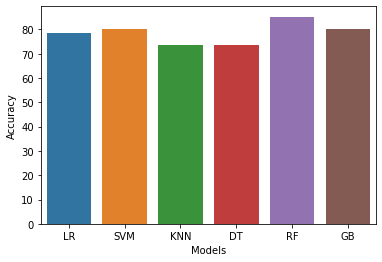

In [66]:
sns.barplot(final_data["Models"] ,final_data["Accuracy"])


### As we can see from the above plot, a Random forest classifier is the best algorithm for this dataset.

### So please remember, we have trained our model on X_train and y_train (means on 80% data only). Before model deployment, we have to train our selected mode on 100% data. So let’s train our random forest model on 100% data.

In [67]:
X = data.drop("target" ,axis =1)
y= data["target"]

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

### 15. Prediction on New Data

### Let’s perform prediction on new data using a random forest algorithm. For that, I have created a pandas dataframe.

In [70]:
import pandas as pd

In [71]:
new_data = pd.DataFrame({
    "age":52,
    "sex":1,
    "cp":0,
    "trestbps":125,
    "chol":212,
    "fbs":0,
    "restecg":1,
    "thalach":168,
    "exang":0,
    "oldpeak":1.0,
    "slope":2,
    "ca":2,
    "thal":3,
 
    
    
},index = [0])

In [72]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [73]:
p= rf.predict(new_data)
if p ==0:
    print("No Disease")
else:
    print("Disease")


No Disease


### Now, let’s save our trained model, so again and again, training is not required. We can perform predictions using the saved model.


### 16. Save Model using Joblib

In [74]:
import joblib

In [75]:
joblib.dump(rf,"model_joblib_heart")

['model_joblib_heart']

In [76]:
model = joblib.load("model_joblib_heart")

In [77]:
model.predict(new_data)

array([0], dtype=int64)

# GUI

# Here we are going to create GUI for our project. So anyone can perform predictions using this GUI.

In [78]:
from tkinter import *
import joblib

In [ ]:

def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=int(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=int(e8.get())
    p9=int(e9.get())
    p10=float(e10.get())
    p11=int(e11.get())
    p12=int(e12.get())
    p13=int(e13.get())
    model = joblib.load('model_joblib_heart')
    result=model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p8,p10,p11,p12,p13]])
    
    if result == 0:
        Label(master, text="No Heart Disease").grid(row=31)
    else:
        Label(master, text="Possibility of Heart Disease").grid(row=31)
    
    
master = Tk()
master.title("Heart Disease Prediction System")


label = Label(master, text = "Heart Disease Prediction System"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)


Label(master, text="Enter Your Age").grid(row=1)
Label(master, text="Male Or Female [1/0]").grid(row=2)
Label(master, text="Enter Value of CP").grid(row=3)
Label(master, text="Enter Value of trestbps").grid(row=4)
Label(master, text="Enter Value of chol").grid(row=5)
Label(master, text="Enter Value of fbs").grid(row=6)
Label(master, text="Enter Value of restecg").grid(row=7)
Label(master, text="Enter Value of thalach").grid(row=8)
Label(master, text="Enter Value of exang").grid(row=9)
Label(master, text="Enter Value of oldpeak").grid(row=10)
Label(master, text="Enter Value of slope").grid(row=11)
Label(master, text="Enter Value of ca").grid(row=12)
Label(master, text="Enter Value of thal").grid(row=13)



e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)
e13 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)
e13.grid(row=13, column=1)



Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()